# Taux de désabonnement

## Importations

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Activation
import seaborn as sns

## Traitement de la data

In [92]:
#lecture du fichier csv
data = pd.read_csv('data.csv')
data

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
# drop de toute les colonnes non voulue
data = data.drop(['num_ligne','ID_Client','Nom'], axis=1)
data

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [94]:
#transformation de la colonne "sex" avec LabelEncoder
LabEnc = LabelEncoder()
data['Sex']=LabEnc.fit_transform(data['Sex'])
data

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [95]:
# transformation de la colonne "pays" en trois colonne(une par pays) avec get_dummies
data = pd.get_dummies(data)
data

,Score_Credit,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited,Pays_France,Pays_Germany,Pays_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [96]:
X = data.drop('Exited',axis=1).values
X.shape

(10000, 12)

In [97]:
#assignation des targets a y
y = data['Exited'].copy()
y.shape

(10000,)

## Models IA

### Séparation en jeu de donnée et jeu de test

In [98]:
# Séparation a hauteur de 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


### Model SVC

In [99]:
svc = SVC()

In [100]:
#fit du model SVC
start = time.time()

svc.fit(X_train,y_train)

done = time.time()
elapsed = done - start
print(format(elapsed, '.2f'))

1.51


In [101]:
#prediction sur le model SVC
pred = svc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
#score du model
score = svc.score(X_train, y_train)
score

0.798125

### Model RFC

In [103]:
rfc = RandomForestClassifier()

In [104]:
# fir du model 
start = time.time()

rfc.fit(X_train,y_train)

done = time.time()
elapsed = done - start
print(format(elapsed, '.2f'))

1.04


In [105]:
#prediction et score sur le model
pred_rfc = rfc.predict(X_test)
acc_score = accuracy_score(y_test, pred_rfc)
print(acc_score)

0.8605


### Réseau de neuronne

In [106]:
# construction de réseau de neuronne
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [109]:
# fit du réseau avec un batch size de 100 et 3 epochs
model.fit(X_train, y_train, batch_size=100, epochs=3, verbose=1, validation_data=(X_test, y_test))

Epoch 1/3
80/80 [==============================] - 0s 3ms/step - loss: 604.7650 - accuracy: 0.6718 - val_loss: 101.5037 - val_accuracy: 0.7045
Epoch 2/3
80/80 [==============================] - 0s 2ms/step - loss: 539.4562 - accuracy: 0.6702 - val_loss: 565.8956 - val_accuracy: 0.2250
Epoch 3/3
80/80 [==============================] - 0s 2ms/step - loss: 525.3109 - accuracy: 0.6746 - val_loss: 353.6130 - val_accuracy: 0.7890


In [110]:
# prediction du le réseau, score puis matice de confusion
y_pred = model.predict_classes(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("L'accuracy est de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred)

L'accuracy est de : 0.789


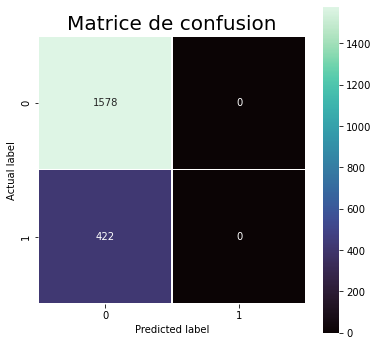

In [111]:
#matrice de confusion avec seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size=20)
plt.show()

### Le meme réseaux de neuronne avec StandardScaler

In [112]:
# Scale des donné avec standardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [113]:
# fit du model avec les meme parametre que precedament
model.fit(X_train_s,y_train,epochs=3, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/3
80/80 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7835 - val_loss: 3908.2561 - val_accuracy: 0.7890
Epoch 2/3
80/80 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8052 - val_loss: 4464.9849 - val_accuracy: 0.7890
Epoch 3/3
80/80 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8163 - val_loss: 5454.0293 - val_accuracy: 0.7890


In [114]:
# prediction du le réseau, score puis matice de confusion
y_pred_s = model.predict_classes(X_test_s)
score = metrics.accuracy_score(y_test,y_pred_s)
print("L'accuracy est de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred_s)

L'accuracy est de : 0.822


C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


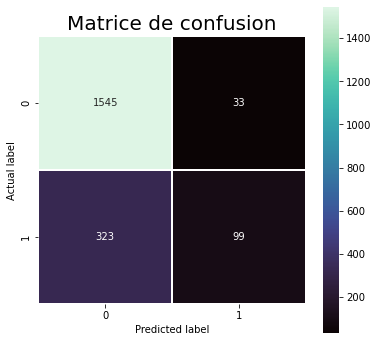

In [115]:
#matrice de confusion avec seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size=20)
plt.show()